# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings # to suppress warnings 
filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None 
pd.options.display.float_format = '{:.6f}'.format
import random
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

In [2]:
from google.colab import files
file=files.upload()

Saving timely_res_1305.xlsx to timely_res_1305.xlsx


In [3]:
df=pd.read_excel('timely_res_1305.xlsx')
df.head()

,Product,Sub-product,Issue,Company,Submitted via,Company response to consumer,Timely response?,Regions,Duration
0,Loan reports,Credit reporting,Problem with a credit reporting company's inve...,First Advantage LNS Inc.,Web,Untimely response,No,Southeast,1
1,Loan,Installment loan,Problem with additional add-on products or ser...,College Lending Solutions of Salem,Web,Untimely response,No,Southeast,0
2,Debt collection,Auto debt,Took or threatened to take negative or legal a...,"Creditmax Collection Agency, Inc. d/b/a Credit...",Web,Untimely response,No,Midwest,0
3,Debt collection,Other debt,Attempts to collect debt not owed,"Biehl & Biehl, Inc",Web,Untimely response,No,West,0
4,Debt collection,Other debt,Took or threatened to take negative or legal a...,"Genesis Credit Management, LLC",Web,Untimely response,No,West,0


In [4]:
l=['Product','Submitted via','Timely response?','Regions','Company response to consumer']

In [5]:
for i in l:
  df[i]=df[i].factorize()[0]

In [6]:
l1=['Sub-product','Issue','Company']

In [7]:
for i in l1:
  d=(df.groupby(i).size()) / len(df)
  df[i]=df[i].apply(lambda x : d[x])

In [8]:
df.head()

,Product,Sub-product,Issue,Company,Submitted via,Company response to consumer,Timely response?,Regions,Duration
0,0,0.225098,0.037146,0.002480,0,0,0,0,1
1,1,0.017416,0.000220,0.000037,0,0,0,0,0
2,2,0.009534,0.018003,0.000018,0,0,0,1,0
3,2,0.188504,0.140739,0.000129,0,0,0,2,0
4,2,0.188504,0.018003,0.000955,0,0,0,2,0


In [9]:
X=df.drop('Timely response?',axis=1)
y=df['Timely response?']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.25,stratify=y)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (40825, 8)
y_train (40825,)
X_test (13609, 8)
y_test (13609,)


# Base Model - RF

In [ ]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)
rf_model_fac = rf_classification.fit(X_train, y_train)

In [ ]:
y_pred=rf_model_fac.predict(X_test)
print('confusion_matrix:',confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

confusion_matrix: [[5572 1232]
 [1525 5280]]
0.7974134763759277
0.7929713899526921
0.7759000734753857
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      6804
           1       0.81      0.78      0.79      6805

    accuracy                           0.80     13609
   macro avg       0.80      0.80      0.80     13609
weighted avg       0.80      0.80      0.80     13609



Text(0.5, 15.0, 'Confusion Matrix')

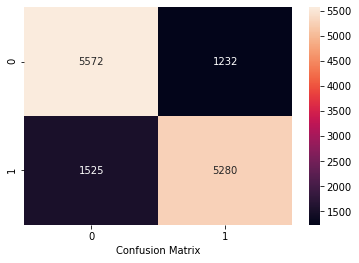

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.8g')
plt.xlabel('Confusion Matrix')

In [ ]:
y_pred_train=rf_model_fac.predict(X_train)
print('confusion_matrix:',confusion_matrix(y_train,y_pred_train))
print(accuracy_score(y_train,y_pred_train))
print(f1_score(y_train,y_pred_train))
print(recall_score(y_train,y_pred_train))
print(classification_report(y_train,y_pred_train))

confusion_matrix: [[19005  1407]
 [ 1314 19099]]
0.9333496631965708
0.9335027737725752
0.9356292558663597
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     20412
           1       0.93      0.94      0.93     20413

    accuracy                           0.93     40825
   macro avg       0.93      0.93      0.93     40825
weighted avg       0.93      0.93      0.93     40825



Text(0.5, 15.0, 'Confusion Matrix')

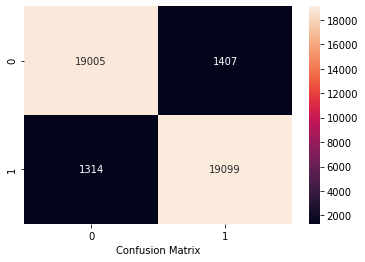

In [ ]:
sns.heatmap(confusion_matrix(y_train,y_pred_train),annot=True,fmt='.8g')
plt.xlabel('Confusion Matrix')

# Base Model - XGB

In [ ]:
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred=xgb_model.predict(X_test)
print('confusion_matrix:',confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

confusion_matrix: [[5962  842]
 [1429 5376]]
0.8331251377764715
0.8256162174614144
0.7900073475385746
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      6804
           1       0.86      0.79      0.83      6805

    accuracy                           0.83     13609
   macro avg       0.84      0.83      0.83     13609
weighted avg       0.84      0.83      0.83     13609



Text(0.5, 15.0, 'Confusion Matrix')

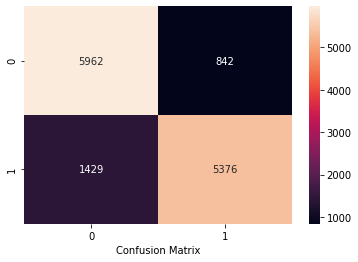

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.8g')
plt.xlabel('Confusion Matrix')

In [ ]:
y_pred_train=xgb_model.predict(X_train)
print('confusion_matrix:',confusion_matrix(y_train,y_pred_train))
print(accuracy_score(y_train,y_pred_train))
print(f1_score(y_train,y_pred_train))
print(recall_score(y_train,y_pred_train))
print(classification_report(y_train,y_pred_train))

confusion_matrix: [[18399  2013]
 [ 3500 16913]]
0.8649601959583588
0.8598591728310327
0.8285406358692989
              precision    recall  f1-score   support

           0       0.84      0.90      0.87     20412
           1       0.89      0.83      0.86     20413

    accuracy                           0.86     40825
   macro avg       0.87      0.86      0.86     40825
weighted avg       0.87      0.86      0.86     40825



Text(0.5, 15.0, 'Confusion Matrix')

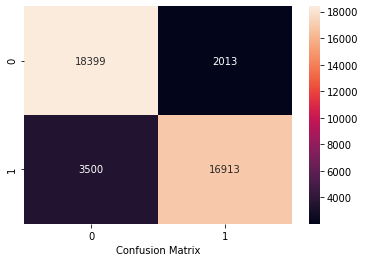

In [ ]:
sns.heatmap(confusion_matrix(y_train,y_pred_train),annot=True,fmt='.8g')
plt.xlabel('Confusion Matrix')

# Forward Selection - XGB

In [ ]:
from xgboost import XGBClassifier
from mlxtend.feature_selection import SequentialFeatureSelector
forward_feature_selector = SequentialFeatureSelector(XGBClassifier(n_jobs=-1),
           k_features='best',
           forward=True,
           verbose=2,
           scoring='f1',
           cv=5)
           
fselector = forward_feature_selector.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   20.9s finished

[2021-06-22 04:59:25] Features: 1/8 -- score: 0.7663798420743146[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   23.0s finished

[2021-06-22 04:59:48] Features: 2/8 -- score: 0.7797075984838313[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   22.5s finished

[2021-06-22 05:00:10] Features: 3/8 -- score: 0.7889975945215537[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [ ]:
fselector.k_feature_names_  

('Product', 'Sub-product', 'Company', 'Regions')

# XGB base model with forward selection features

In [10]:
X_fs_xgb=X[['Product', 'Sub-product', 'Company', 'Regions']]

In [11]:
X_train_xfs, X_test_xfs, y_train_xfs, y_test_xfs = train_test_split(X_fs_xgb, y, random_state = 10, test_size = 0.25,stratify=y)
print('X_train', X_train_xfs.shape)
print('y_train', y_train_xfs.shape)
print('X_test', X_test_xfs.shape)
print('y_test', y_test_xfs.shape)

X_train (40825, 4)
y_train (40825,)
X_test (13609, 4)
y_test (13609,)


In [ ]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train_fs, y_train_fs)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred_fs=xgb_model.predict(X_test_fs)
print('confusion_matrix:',confusion_matrix(y_test_fs,y_pred_fs))
print(accuracy_score(y_test_fs,y_pred_fs))
print(f1_score(y_test_fs,y_pred_fs))
print(recall_score(y_test_fs,y_pred_fs))
print(classification_report(y_test_fs,y_pred_fs))

confusion_matrix: [[5856  948]
 [1735 5070]]
0.8028510544492615
0.7907665912812915
0.7450404114621602
              precision    recall  f1-score   support

           0       0.77      0.86      0.81      6804
           1       0.84      0.75      0.79      6805

    accuracy                           0.80     13609
   macro avg       0.81      0.80      0.80     13609
weighted avg       0.81      0.80      0.80     13609



Text(0.5, 15.0, 'Confusion Matrix')

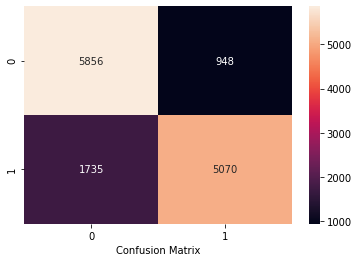

In [ ]:
sns.heatmap(confusion_matrix(y_test_fs,y_pred_fs),annot=True,fmt='.8g')
plt.xlabel('Confusion Matrix')

In [ ]:
y_pred_train_fs=xgb_model.predict(X_train_fs)
print('confusion_matrix:',confusion_matrix(y_train_fs,y_pred_train_fs))
print(accuracy_score(y_train_fs,y_pred_train_fs))
print(f1_score(y_train_fs,y_pred_train_fs))
print(recall_score(y_train_fs,y_pred_train_fs))
print(classification_report(y_train_fs,y_pred_train_fs))

confusion_matrix: [[17537  2875]
 [ 5054 15359]]
0.805780771586038
0.7948353041633245
0.7524126781952677
              precision    recall  f1-score   support

           0       0.78      0.86      0.82     20412
           1       0.84      0.75      0.79     20413

    accuracy                           0.81     40825
   macro avg       0.81      0.81      0.81     40825
weighted avg       0.81      0.81      0.81     40825



Text(0.5, 15.0, 'Confusion Matrix')

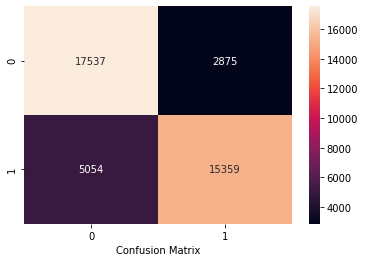

In [ ]:
sns.heatmap(confusion_matrix(y_train_fs,y_pred_train_fs),annot=True,fmt='.8g')
plt.xlabel('Confusion Matrix')

# GridSearchCV - XGB

In [ ]:
xgb_model = XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb_model.fit(X_train_xfs, y_train_xfs)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, verbosity=1)

In [ ]:
y_pred=xgb_model.predict(X_test_xfs)
print('confusion_matrix:',confusion_matrix(y_test_xfs,y_pred))
print(accuracy_score(y_test_xfs,y_pred))
print(f1_score(y_test_xfs,y_pred))
print(recall_score(y_test_xfs,y_pred))
print(classification_report(y_test_xfs,y_pred))

confusion_matrix: [[5924  880]
 [1471 5334]]
0.8272466749944889
0.8194177740225824
0.7838354151359295
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      6804
           1       0.86      0.78      0.82      6805

    accuracy                           0.83     13609
   macro avg       0.83      0.83      0.83     13609
weighted avg       0.83      0.83      0.83     13609



In [ ]:
param_test1 = {
 'max_depth':range(3,15,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='precision',n_jobs=-1, cv=5,verbose=1)
gsearch1.fit(X_train_xfs, y_train_xfs)

In [ ]:
 gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 3, 'min_child_weight': 5}, 0.8593731257234258)

In [ ]:
# ({'max_depth': 3, 'min_child_weight': 5}, 0.8593731257234258)

In [ ]:
param_test2 = {
 'max_depth':[2,3,4],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=500, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='precision',n_jobs=-1, cv=5,verbose=2)
gsearch2.fit(X_train_xfs, y_train_xfs)
gsearch2.best_params_, gsearch2.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  3.6min finished


({'max_depth': 4, 'min_child_weight': 5}, 0.8618952401659691)

In [ ]:
# ({'max_depth': 4, 'min_child_weight': 5}, 0.8618952401659691)

In [ ]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=500, max_depth=4,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='precision',n_jobs=-1,cv=5,verbose=1)
gsearch3.fit(X_train_xfs, y_train_xfs)
gsearch3.best_params_, gsearch3.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.4min finished


({'gamma': 0.2}, 0.8619156621228253)

In [ ]:
# ({'gamma': 0.2}, 0.8619156621228253)

In [ ]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=500, max_depth=4,
 min_child_weight=5, gamma=0.2, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='precision',n_jobs=-1,cv=5,verbose=1)
gsearch4.fit(X_train_xfs, y_train_xfs)
gsearch4.best_params_, gsearch4.best_score_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  7.3min finished


({'colsample_bytree': 0.8, 'subsample': 0.8}, 0.8619156621228253)

In [ ]:
# ({'colsample_bytree': 0.8, 'subsample': 0.8}, 0.8619156621228253)

In [ ]:
param_test5 = {
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=500, max_depth=4,
 min_child_weight=5, gamma=0.2, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='precision',n_jobs=-1,cv=5,verbose=1)
gsearch5.fit(X_train_xfs, y_train_xfs)
gsearch5.best_params_,gsearch5.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  4.2min finished


({'colsample_bytree': 0.75, 'subsample': 0.8}, 0.8619156621228253)

In [ ]:
# ({'colsample_bytree': 0.75, 'subsample': 0.8}, 0.8619156621228253)

In [ ]:
gsearch5.best_score_

0.8619156621228253

In [ ]:
param_test6 = {
'n_estimators':[250,500,750,1000],
'learning_rate':[0.05,0.01,0.1,0.15,0.2]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=500, max_depth=4,
 min_child_weight=5, gamma=0.2, subsample=0.8, colsample_bytree=0.75,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='precision',n_jobs=-1,cv=5,verbose=1)
gsearch6.fit(X_train_xfs, y_train_xfs)
gsearch6.best_params_, gsearch6.best_score_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 11.8min finished


({'learning_rate': 0.1, 'n_estimators': 500}, 0.8619156621228253)

In [ ]:
gsearch6.best_params_, gsearch6.best_score_

({'learning_rate': 0.1, 'n_estimators': 500}, 0.8619156621228253)

In [ ]:
# ({'learning_rate': 0.1, 'n_estimators': 500}

# Final Model

In [12]:
xgb_model = XGBClassifier(learning_rate =0.1, n_estimators=500, max_depth=4,
 min_child_weight=5, gamma=0.2, subsample=0.8, colsample_bytree=0.75,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)
xgb_model.fit(X_train_xfs, y_train_xfs)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.75, gamma=0.2,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=5, missing=None, n_estimators=500, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, verbosity=1)

In [ ]:
y_pred_xfs=xgb_model.predict(X_test_xfs)
print('confusion_matrix:',confusion_matrix(y_test_xfs,y_pred_xfs))
print(accuracy_score(y_test_xfs,y_pred_xfs))
print(f1_score(y_test_xfs,y_pred_xfs))
print(recall_score(y_test_xfs,y_pred_xfs))
print(classification_report(y_test_xfs,y_pred_xfs))

confusion_matrix: [[5950  854]
 [1564 5241]]
0.8223234624145785
0.8125581395348838
0.7701689933872152
              precision    recall  f1-score   support

           0       0.79      0.87      0.83      6804
           1       0.86      0.77      0.81      6805

    accuracy                           0.82     13609
   macro avg       0.83      0.82      0.82     13609
weighted avg       0.83      0.82      0.82     13609



Text(0.5, 15.0, 'Confusion Matrix')

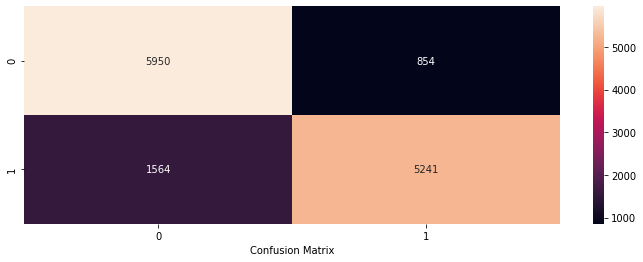

In [ ]:
sns.heatmap(confusion_matrix(y_test_xfs,y_pred_xfs),annot=True,fmt='.8g')
plt.xlabel('Confusion Matrix')

In [ ]:
y_pred_train_xfs=xgb_model.predict(X_train_xfs)
print('confusion_matrix:',confusion_matrix(y_train_xfs,y_pred_train_xfs))
print(accuracy_score(y_train_xfs,y_pred_train_xfs))
print(f1_score(y_train_xfs,y_pred_train_xfs))
print(recall_score(y_train_xfs,y_pred_train_xfs))
print(classification_report(y_train_xfs,y_pred_train_xfs))

confusion_matrix: [[17973  2439]
 [ 4481 15932]]
0.8304960195958359
0.821575907590759
0.780483025522951
              precision    recall  f1-score   support

           0       0.80      0.88      0.84     20412
           1       0.87      0.78      0.82     20413

    accuracy                           0.83     40825
   macro avg       0.83      0.83      0.83     40825
weighted avg       0.83      0.83      0.83     40825



Text(0.5, 15.0, 'Confusion Matrix')

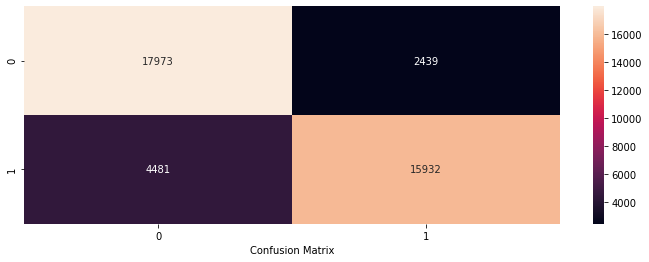

In [ ]:
sns.heatmap(confusion_matrix(y_train_xfs,y_pred_train_xfs),annot=True,fmt='.8g')
plt.xlabel('Confusion Matrix')

In [ ]:
# Pred proba

In [13]:
y_pred=xgb_model.predict(X_test_xfs)
y_pred_proba_test=xgb_model.predict_proba(X_test_xfs)
y_pred1=[1 if x<=0.40 else 0 for x in y_pred_proba_test[:,0]]
print('confusion_matrix:\n',confusion_matrix(y_test_xfs,y_pred))
print('confusion_matrix_proba:\n',confusion_matrix(y_test_xfs,y_pred1))
print(accuracy_score(y_test_xfs,y_pred))
print(f1_score(y_test_xfs,y_pred))
print(recall_score(y_test_xfs,y_pred))
print(classification_report(y_test_xfs,y_pred))
print(classification_report(y_test_xfs,y_pred1))

confusion_matrix:
 [[5950  854]
 [1564 5241]]
confusion_matrix_proba:
 [[6110  694]
 [1756 5049]]
0.8223234624145785
0.8125581395348838
0.7701689933872152
              precision    recall  f1-score   support

           0       0.79      0.87      0.83      6804
           1       0.86      0.77      0.81      6805

    accuracy                           0.82     13609
   macro avg       0.83      0.82      0.82     13609
weighted avg       0.83      0.82      0.82     13609

              precision    recall  f1-score   support

           0       0.78      0.90      0.83      6804
           1       0.88      0.74      0.80      6805

    accuracy                           0.82     13609
   macro avg       0.83      0.82      0.82     13609
weighted avg       0.83      0.82      0.82     13609



In [ ]:
(694)/(6110+694) 

0.10199882422104645

In [ ]:
1756/(1756+5049)

0.2580455547391624

In [ ]:
y_pred.round(2)

array([0, 1, 0, ..., 1, 0, 1])

In [ ]:
y_pred_proba_test[:,0]

array([0.8048206 , 0.07110369, 0.7958678 , ..., 0.39884698, 0.785849  ,
       0.00380993], dtype=float32)

Text(0.5, 15.0, 'Confusion Matrix')

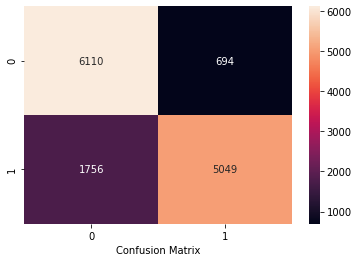

In [14]:
sns.heatmap(confusion_matrix(y_test_xfs,y_pred1),annot=True,fmt='.8g')
plt.xlabel('Confusion Matrix')

In [ ]:
y_pred_train=xgb_model.predict(X_train_xfs)
print('confusion_matrix:',confusion_matrix(y_train_xfs,y_pred_train))
print(accuracy_score(y_train_xfs,y_pred_train))
print(f1_score(y_train_xfs,y_pred_train))
print(recall_score(y_train_xfs,y_pred_train))
print(classification_report(y_train_xfs,y_pred_train))


confusion_matrix: [[17973  2439]
 [ 4481 15932]]
0.8304960195958359
0.821575907590759
0.780483025522951
              precision    recall  f1-score   support

           0       0.80      0.88      0.84     20412
           1       0.87      0.78      0.82     20413

    accuracy                           0.83     40825
   macro avg       0.83      0.83      0.83     40825
weighted avg       0.83      0.83      0.83     40825



Text(0.5, 15.0, 'Confusion Matrix')

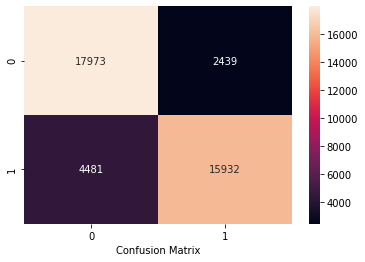

In [ ]:
sns.heatmap(confusion_matrix(y_train_xfs,y_pred_train),annot=True,fmt='.8g')
plt.xlabel('Confusion Matrix')

In [ ]:
important_features = pd.DataFrame({'Features': X_train_xfs.columns,'Importance': xgb_model.feature_importances_}) 
fe_imp=important_features.sort_values(by='Importance',ascending=False)

In [ ]:
fe_imp

,Features,Importance
2,Company,0.549823
0,Product,0.239261
1,Sub-product,0.181707
3,Regions,0.029209


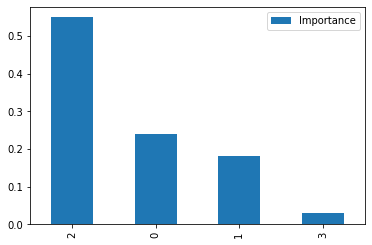

In [ ]:
fe_imp.plot(kind = 'bar')

In [ ]:
x = fe_imp['Features']
y = fe_imp['Importance']

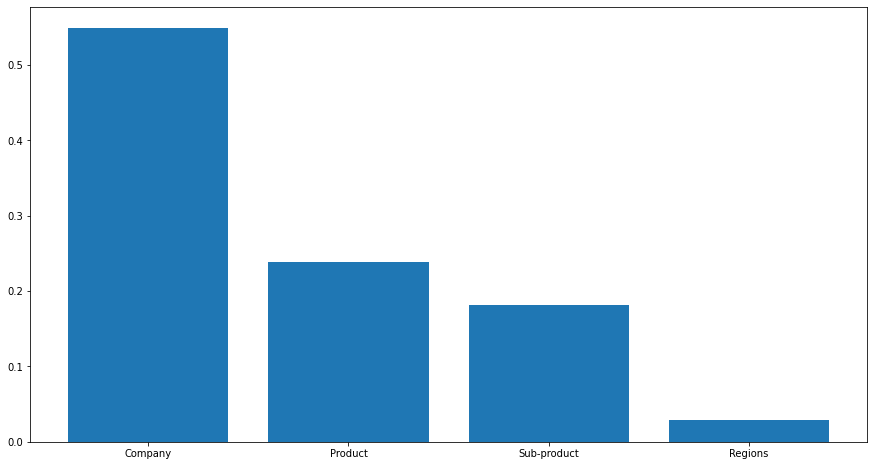

In [ ]:
plt.figure(figsize = [15,8])
plt.bar(x,y)
plt.show()

# Forward Selection - RF

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector
forward_feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),
           k_features='best',
           forward=True,
           verbose=2,
           scoring='f1',
           cv=5)
           
fselector = forward_feature_selector.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   33.0s finished

[2021-06-22 05:25:16] Features: 1/8 -- score: 0.7752039002316085[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   49.8s finished

[2021-06-22 05:26:06] Features: 2/8 -- score: 0.8216916754872534[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   52.2s finished

[2021-06-22 05:26:58] Features: 3/8 -- score: 0.8290503227065784[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [ ]:
fselector.k_feature_names_

('Sub-product', 'Company', 'Company response to consumer')

# RF base model with forward selection features

In [ ]:
X_fs_rf=X[['Sub-product', 'Company', 'Company response to consumer']]

In [ ]:
X_train_fs_rf, X_test_fs_rf, y_train_fs_rf, y_test_fs_rf = train_test_split(X_fs_rf, y, random_state = 10, test_size = 0.25,stratify=y)
print('X_train', X_train_fs_rf.shape)
print('y_train', y_train_fs_rf.shape)
print('X_test', X_test_fs_rf.shape)
print('y_test', y_test_fs_rf.shape)

X_train (40825, 3)
y_train (40825,)
X_test (13609, 3)
y_test (13609,)


In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_fs_rf, y_train_fs_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred_fs_rf=rf_model.predict(X_test_fs_rf)
print('confusion_matrix:',confusion_matrix(y_test_fs_rf,y_pred_fs_rf))
print(accuracy_score(y_test_fs_rf,y_pred_fs_rf))
print(f1_score(y_test_fs_rf,y_pred_fs_rf))
print(recall_score(y_test_fs_rf,y_pred_fs_rf))
print(classification_report(y_test_fs_rf,y_pred_fs_rf))

confusion_matrix: [[5690 1114]
 [1184 5621]]
0.8311411565875524
0.8302806499261448
0.8260102865540044
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      6804
           1       0.83      0.83      0.83      6805

    accuracy                           0.83     13609
   macro avg       0.83      0.83      0.83     13609
weighted avg       0.83      0.83      0.83     13609



Text(0.5, 15.0, 'Confusion Matrix')

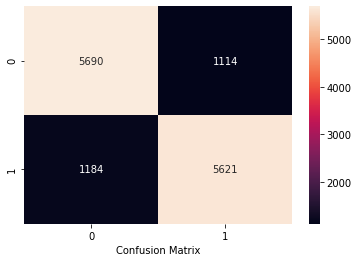

In [ ]:
sns.heatmap(confusion_matrix(y_test_fs_rf,y_pred_fs_rf),annot=True,fmt='.8g')
plt.xlabel('Confusion Matrix')

In [ ]:
y_pred_train_fs_rf=rf_model.predict(X_train_fs_rf)
print('confusion_matrix:',confusion_matrix(y_train_fs_rf,y_pred_train_fs_rf))
print(accuracy_score(y_train_fs_rf,y_pred_train_fs_rf))
print(f1_score(y_train_fs_rf,y_pred_train_fs_rf))
print(recall_score(y_train_fs_rf,y_pred_train_fs_rf))
print(classification_report(y_train_fs_rf,y_pred_train_fs_rf))

confusion_matrix: [[17614  2798]
 [ 3053 17360]]
0.8566809552969994
0.8557836878558577
0.8504384460882771
              precision    recall  f1-score   support

           0       0.85      0.86      0.86     20412
           1       0.86      0.85      0.86     20413

    accuracy                           0.86     40825
   macro avg       0.86      0.86      0.86     40825
weighted avg       0.86      0.86      0.86     40825



Text(0.5, 15.0, 'Confusion Matrix')

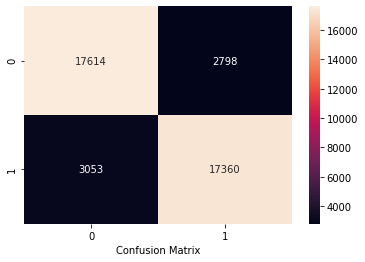

In [ ]:
sns.heatmap(confusion_matrix(y_train_fs_rf,y_pred_train_fs_rf),annot=True,fmt='.8g')
plt.xlabel('Confusion Matrix')

# GridSearchCV - RF

In [ ]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'max_depth': range(3,15,2)
                     }]
random_forest_classification = RandomForestClassifier(random_state=10,n_estimators=500)
rf_grid_fac = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       scoring='precision',n_jobs=-1, cv=5,verbose=1
                       )
rf_grid_model_fac = rf_grid_fac.fit(X_train_rf, y_train_rf)
print('Best parameters for random forest classifier: ', rf_grid_model_fac.best_params_, '\n')

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  4.1min finished


Best parameters for random forest classifier:  {'criterion': 'entropy', 'max_depth': 13} 



In [ ]:
#Best parameters for random forest classifier:  {'criterion': 'entropy', 'max_depth': 13}

In [ ]:
tuned_paramaters = [{'max_depth': range(13,100,2)
                     }]
random_forest_classification = RandomForestClassifier(random_state=10,n_estimators=500,criterion='entropy')
rf_grid_fac = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       scoring='precision',n_jobs=-1, cv=5,verbose=1
                       )
rf_grid_model_fac = rf_grid_fac.fit(X_train_rf, y_train_rf)
print('Best parameters for random forest classifier: ', rf_grid_model_fac.best_params_, '\n')

Fitting 5 folds for each of 44 candidates, totalling 220 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 22.2min
[Parallel(n_jobs=-1)]: Done 220 out of 220 | elapsed: 24.9min finished


Best parameters for random forest classifier:  {'max_depth': 17} 



In [ ]:
#Best parameters for random forest classifier:  {'max_depth': 17}

In [ ]:
tuned_paramaters = [{'max_depth': [16,17,18]
                     }]
random_forest_classification = RandomForestClassifier(random_state=10,n_estimators=500,criterion='entropy')
rf_grid_fac = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       scoring='precision',n_jobs=-1, cv=5,verbose=1
                       )
rf_grid_model_fac = rf_grid_fac.fit(X_train_rf, y_train_rf)
print('Best parameters for random forest classifier: ', rf_grid_model_fac.best_params_, '\n')

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.6min finished


Best parameters for random forest classifier:  {'max_depth': 17} 



In [ ]:
#Best parameters for random forest classifier:  {'max_depth': 17}

In [ ]:
tuned_paramaters = [{'max_features': ['sqrt', 'log2'],'min_samples_split': range(2,21,2)
                     }]
random_forest_classification = RandomForestClassifier(random_state=10,n_estimators=500,criterion='entropy',max_depth=17)
rf_grid_fac = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       scoring='precision',n_jobs=-1, cv=5,verbose=1
                       )
rf_grid_model_fac = rf_grid_fac.fit(X_train_rf, y_train_rf)
print('Best parameters for random forest classifier: ', rf_grid_model_fac.best_params_, '\n')

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 10.5min finished


Best parameters for random forest classifier:  {'max_features': 'sqrt', 'min_samples_split': 12} 



In [ ]:
#Best parameters for random forest classifier:  {'max_features': 'sqrt', 'min_samples_split': 12}

In [ ]:
tuned_paramaters = [{'min_samples_split': [11,12,13]
                     }]
random_forest_classification = RandomForestClassifier(random_state=10,n_estimators=500,criterion='entropy',max_depth=17,max_features='sqrt')
rf_grid_fac = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       scoring='precision',n_jobs=-1, cv=5,verbose=1
                       )
rf_grid_model_fac = rf_grid_fac.fit(X_train_rf, y_train_rf)
print('Best parameters for random forest classifier: ', rf_grid_model_fac.best_params_, '\n')

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.6min finished


Best parameters for random forest classifier:  {'min_samples_split': 12} 



In [ ]:
#Best parameters for random forest classifier:  {'min_samples_split': 12}

In [ ]:
tuned_paramaters = [{'min_samples_leaf': range(2,21,2),'max_leaf_nodes': range(2,21,2)
                     }]
random_forest_classification = RandomForestClassifier(random_state=10,n_estimators=500,criterion='entropy',max_depth=17,max_features='sqrt',
                                                      min_samples_split=12)
rf_grid_fac = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       scoring='precision',n_jobs=-1, cv=5,verbose=1
                       )
rf_grid_model_fac = rf_grid_fac.fit(X_train_rf, y_train_rf)
print('Best parameters for random forest classifier: ', rf_grid_model_fac.best_params_, '\n')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 29.0min finished


Best parameters for random forest classifier:  {'max_leaf_nodes': 18, 'min_samples_leaf': 2} 



In [ ]:
#Best parameters for random forest classifier:  {'max_leaf_nodes': 18, 'min_samples_leaf': 2}

In [ ]:
tuned_paramaters = [{'min_samples_leaf': [2,3],'max_leaf_nodes': [17,18,19],'n_estimators': [200,400,600,800,1000]
                     }]
random_forest_classification = RandomForestClassifier(random_state=10,criterion='entropy',max_depth=17,max_features='sqrt',
                                                      min_samples_split=12)
rf_grid_fac = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       scoring='precision',n_jobs=-1, cv=5,verbose=1
                       )
rf_grid_model_fac = rf_grid_fac.fit(X_train_rf, y_train_rf)
print('Best parameters for random forest classifier: ', rf_grid_model_fac.best_params_, '\n')

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 11.6min finished


Best parameters for random forest classifier:  {'max_leaf_nodes': 18, 'min_samples_leaf': 2, 'n_estimators': 600} 



In [ ]:
#Best parameters for random forest classifier:  {'max_leaf_nodes': 18, 'min_samples_leaf': 2, 'n_estimators': 600}

In [ ]:
tuned_paramaters = [{'n_estimators': [500,600,700]
                     }]
random_forest_classification = RandomForestClassifier(random_state=10,criterion='entropy',max_depth=17,max_features='sqrt',
                                                      min_samples_split=12,min_samples_leaf=2,max_leaf_nodes=18,n_estimators=600)
rf_grid_fac = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       scoring='precision',n_jobs=-1, cv=5,verbose=1
                       )
rf_grid_model_fac = rf_grid_fac.fit(X_train_rf, y_train_rf)
print('Best parameters for random forest classifier: ', rf_grid_model_fac.best_params_, '\n')

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.2min finished


Best parameters for random forest classifier:  {'n_estimators': 600} 



In [ ]:
#Best parameters for random forest classifier:  {'n_estimators': 600}

In [ ]:
# model with rf grid search

In [ ]:
rf_classification = RandomForestClassifier(random_state=10,criterion='entropy',max_depth=17,max_features='sqrt',
                                                      min_samples_split=12,min_samples_leaf=2,max_leaf_nodes=18,n_estimators=600)
rf_model_fac = rf_classification.fit(X_train_rf, y_train_rf)

In [ ]:
#'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 11, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10

In [ ]:
rf_classification = RandomForestClassifier(random_state=10,criterion= 'gini', max_depth= 10, max_features= 'sqrt', max_leaf_nodes= 11, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 10)
rf_model_fac = rf_classification.fit(X_train_rf, y_train_rf)

In [ ]:
y_pred=rf_model_fac.predict(X_test_rf)
print('confusion_matrix:\n',confusion_matrix(y_test_rf,y_pred))
print(accuracy_score(y_test_rf,y_pred))
print(f1_score(y_test_rf,y_pred))
print(recall_score(y_test_rf,y_pred))
print(classification_report(y_test_rf,y_pred))

confusion_matrix:
 [[5825  979]
 [2295 4510]]
0.7594239106473657
0.7336912314950381
0.662747979426892
              precision    recall  f1-score   support

           0       0.72      0.86      0.78      6804
           1       0.82      0.66      0.73      6805

    accuracy                           0.76     13609
   macro avg       0.77      0.76      0.76     13609
weighted avg       0.77      0.76      0.76     13609



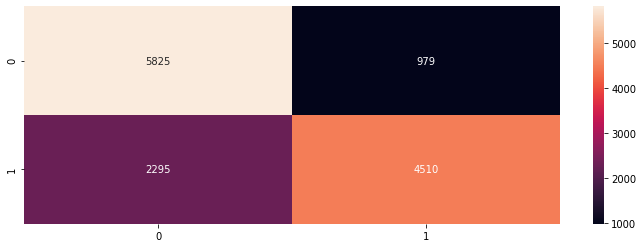

In [ ]:
sns.heatmap(confusion_matrix(y_test_rf,y_pred),annot=True,fmt='.8g')

In [ ]:
y_pred_train=rf_model_fac.predict(X_train_rf)
print('confusion_matrix:\n',confusion_matrix(y_train_rf,y_pred_train))
print(accuracy_score(y_train_rf,y_pred_train))
print(f1_score(y_train_rf,y_pred_train))
print(recall_score(y_train_rf,y_pred_train))
print(classification_report(y_train_rf,y_pred_train))

confusion_matrix:
 [[17466  2946]
 [ 6733 13680]]
0.762914880587875
0.7386808499149545
0.6701611718022829
              precision    recall  f1-score   support

           0       0.72      0.86      0.78     20412
           1       0.82      0.67      0.74     20413

    accuracy                           0.76     40825
   macro avg       0.77      0.76      0.76     40825
weighted avg       0.77      0.76      0.76     40825



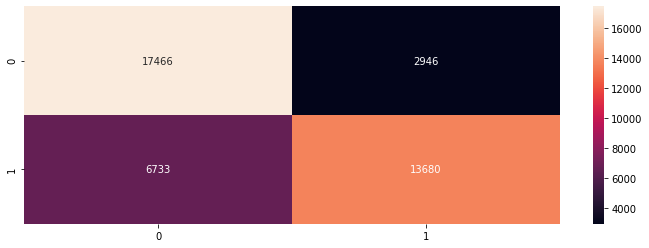

In [ ]:
sns.heatmap(confusion_matrix(y_train_rf,y_pred_train),annot=True,fmt='.8g')